# The Netflix Formula: What Drives High Ratings and Viewer Engagement
**Emily Nguyen**

### Introduction
---
Netflix is a world-wide streaming service that allows users to watch a wide range of movies and TV shows on demand. This analysis explores patterns in Netflix's catalog and what factors contribute to the popularity and ratings of Netflix content. 

**Research Question(s)**:
- **Content Type**: Do movies or TV shows generally receive higher ratings and more engagement?
    - For Viewers: Discover whether movies or shows tend to be better-rated, which can help them decide what to watch if they want something with better reviews.
    - For Netflix: Invest more in the format that drives higher ratings/engagement (e.g., do big-budget movies do better or netflix original shows?)
- **Audience**: How do age certifications (PG, R, TV-MA, etc.) relate to content popularity and ratings?
    - For Viewers: Can understand which age-rated content is most popular or possibly pick content that aligns with what's trending in their age group.
    - For Netflix: Tailor content strategy by certification and which kind of content has the most positive feedback. 
- **Trends Over Time**: How has the popularity or average rating of Netflix releases changed by release year?
    - For Viewers: Can find new movies/shows to watch based on whether older or newer content has higher ratings. 
    - For Netflix: Spot whether newer content is over- or under-performing. 

### Dataset Description
---
This analysis uses the **Netflix TV Shows and Movies Dataset**, available on Kaggle, a Google-owned platform offering open datasets: https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download. It contains **5283** unique values, where each row represents a Netflix show or movie. There are **11 columns** in total, including several variables that may help explain patterns in which Netflix titles get the most attention from viewers, and what factors influence their popularity. Here is a brief description of the variables in this dataset:
- **title**: The name of a TV show or movie. (Text)
- **type**: Indicates whether an entry is a TV show or a movie. (Text)
- **description**: A brief summary or description of a TV show or movie. (Text)
- **release_year**: The year in which a TV show or movie was released. (Numeric)
- **age_certification**: The age certification rating for a TV show or movie (Text)
- **runtime**: The length of an episode for TV shows or duration of a movie. (Numeric)
- **imdb_score**: The score given by users on IMDB for a particular title. (Numeric)
- **imdb_votes**: The number of votes received by each title on IMDB. (Numeric)

In [1]:
import pandas as pd
# importing dataset and creating DataFrame
df = pd.read_csv("Netflix TV Shows and Movies.csv")
df.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [2]:
# get the number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 5283
Number of columns: 11


### Data Cleaning & Preprocessing
---

**Handling Missing Values**

Before analyzing the dataset, I checked for missing values in each column. I was able to find that the 'age_certification' column had the most missing values, with 2,285 entries without an age rating. This is likely due to some older or international titles not having an assigned age rating. Given this is such a significant number, about 43% of the data, I decided to not drop the rows with missing age certification values since I could lose a lot of potentially useful information. 

Additionally, 'idmb_votes' had 16 missing values and 'description' had 5 missing values. All other columns, including 'title', 'type', 'release_year', 'runtime', and 'imdb_score', were complete. To handle these missing values:
- Titles without age_certification were kept in the dataset since other variables (like imdb_score and type) were still available for analysis.
- Missing imdb_votes or description entries were excluded from analyses.

In [3]:
# check for missing values in each column
df.isna().sum().sort_values(ascending=False)

age_certification    2285
imdb_votes             16
description             5
title                   0
id                      0
index                   0
type                    0
release_year            0
runtime                 0
imdb_id                 0
imdb_score              0
dtype: int64

In [4]:
# fill missing age_certification with 'Unknown'
df['age_certification'] = df['age_certification'].fillna('Unknown')

# drop rows where description and idmb_votes are missing
df = df.dropna(subset=['description', 'imdb_votes'])

# check for missing values in each column again
df.isna().sum().sort_values(ascending=False)


index                0
id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64

**Data Type Conversions**

To ensure that each column in the dataset has an appropriate data type, I verified that each column had the appropriate data type, and confirmed that all the columns were correctly typed. 
- Numeric columns such as release_year, runtime, imdb_score, and imdb_votes were integer or float types to allow for arithmetic operations and plotting.
- Categorical or text-based columns, including title, type, description, age_certification, id, and imdb_id, were kept as objects (assuming strings).
- The index column is kept as an integer, serving as a unique identifier for rows in the dataset

In [5]:
df.dtypes

index                  int64
id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

**Filtering Unrealistic Runtimes**

During data cleaning, I also found that some titles had extremely short runtimes (0-10 minutes), which likely corresponds to data entry mistakes or trailers, shortclips, and previews rather than full episodes or movies. Including these entries could skew analyses related to popularity, ratings, and runtime. Given this, I filtered the dataset to include only titles with a runtime of 10 minutes or longer. 

In [6]:
# count rows with runtime less than 10
short_df = df[df['runtime'] < 10]
print(f"Number of titles with runtime under 10 minutes: {short_df.shape[0]}")

Number of titles with runtime under 10 minutes: 67


In [7]:
# remove rows with runtime less than 10
df = df[df['runtime'] >= 10]

num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 5196
Number of columns: 11


After cleaning the dataset, the number of rows decreased from 5283 to **5196**, reflecting the removal of incomplete or unrealistic entries.

### Exploratory Data Analysis (EDA)
---
To begin, I generated summary statistics for the dataset, including measures like counts, averages, and distributions of key variables. This provided a baseline understanding of the Netflix catalog and guided which factors (e.g., content type, age certification, release year, ratings, and engagement) were worth exploring further in the visual analysis.

In [8]:
# summary statistics for numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

summary_stats = df[['release_year', 'runtime', 'imdb_score', 'imdb_votes']].describe()
print(summary_stats.to_string(float_format='{:.2f}'.format))

       release_year  runtime  imdb_score  imdb_votes
count       5196.00  5196.00     5196.00     5196.00
mean        2015.86    80.28        6.53    23718.65
std            7.38    38.20        1.16    87686.56
min         1953.00    10.00        1.50        5.00
25%         2015.00    46.00        5.80      536.75
50%         2018.00    88.00        6.60     2326.00
75%         2020.00   106.00        7.40    10376.25
max         2022.00   235.00        9.60  2268288.00


### Content Type - Movies or TV Shows?
---
This section compares how movies and TV shows perform on Netflix in terms of both ratings and engagement. By examining averages and top-performing titles, the analysis highlights differences in audience reception and cultural impact between the two content types.

The Distribution of Movies vs TV Shows chart highlights how Netflix's catalog seems to be heavily skewed towards more movies. 

I chose a bar chart here since it was intuitive and easy to interpret for anyone. It clearly shows the imbalance in Netflix's catalog and makes it easy to compare counts.

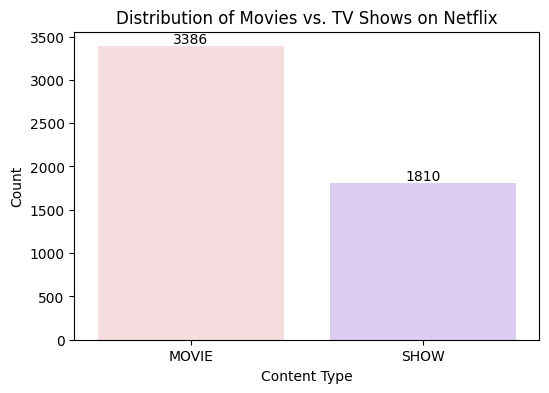

In [9]:
# color pallete
palette = {
    "MOVIE": "#FADADD", # pink
    "SHOW": "#DCC7F8" # purple
}

# bar chart of movies vs tv shows distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="type", hue="type", palette=palette)
for container in ax.containers: # add labels to bars
    ax.bar_label(container)

plt.title("Distribution of Movies vs. TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

On average, **TV shows have higher IMDb scores** (7.02) compared to movies (6.27), suggesting that viewers tend to rate shows more favorably. However, **movies have significantly more IMDb votes** (26,723 vs 18,099), indicating greater overall engagement. However, it's important to take into account that Netflix has **far more movies than TV shows** in its catalog, so the higher vote counts for movies likely reflect their greater quantity rather than higher popularity per title.

In [10]:
# average IMDb score by content type
avg_imdb_score = df.groupby("type", as_index=False)["imdb_score"].mean().round(2)

# average IMDb votes by content type
avg_imdb_votes = df.groupby("type", as_index=False)["imdb_votes"].mean().round(2)

display(avg_imdb_score.style.set_caption("Average IMDb Score by Content Type"))
display(avg_imdb_votes.style.set_caption("Average IMDb Votes by Content Type"))

,type,imdb_score
0,MOVIE,6.270000
1,SHOW,7.020000


,type,imdb_votes
0,MOVIE,26722.580000
1,SHOW,18099.140000


This chart compares the top 5 and bottom 5 titles across both Netflix movies and TV shows. The differences highlight how Netflix's best performing content earns scroes above 8, while the lowest rated titles drop closer to 1-3. When comparing the top 5 rated titles, TV shows consistently have higher IMDb scores than movies. This suggests that Netflix's strongest shows might resonate more deeply with audience rather than its strongest movies, reinforcing the finding that shows tends to be rated more favorably overall. 

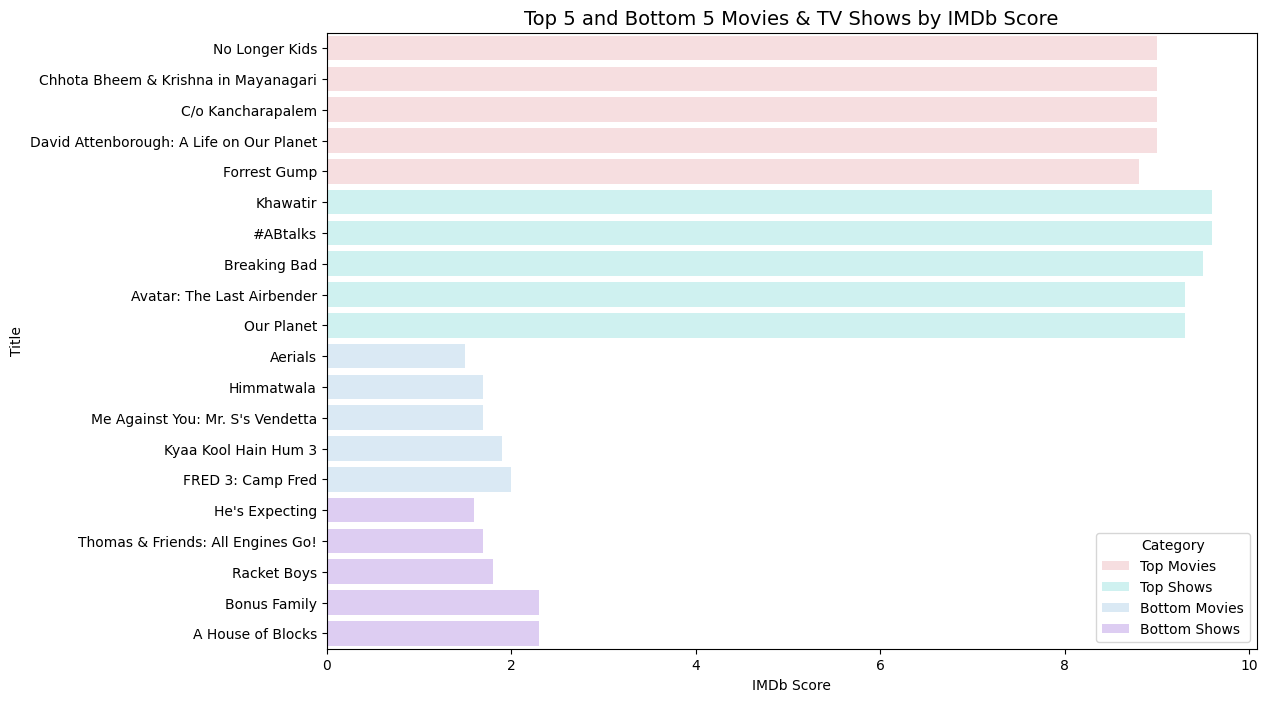

In [11]:
# top 5 movies and shows by IMDb score
top5_movies = df[df["type"]=="MOVIE"].nlargest(5, "imdb_score")[["title","imdb_score"]].assign(category="Top Movies")
top5_shows = df[df["type"]=="SHOW"].nlargest(5, "imdb_score")[["title","imdb_score"]].assign(category="Top Shows")

# bottom 5 movies and shows by IMDb score
bottom5_movies = df[df["type"]=="MOVIE"].nsmallest(5, "imdb_score")[["title","imdb_score"]].assign(category="Bottom Movies")
bottom5_shows = df[df["type"]=="SHOW"].nsmallest(5, "imdb_score")[["title","imdb_score"]].assign(category="Bottom Shows")

combined = pd.concat([top5_movies, top5_shows, bottom5_movies, bottom5_shows])

# color pallette for categories
category_palette = {
    "Top Movies": "#FADADD",
    "Top Shows": "#C9F7F5",
    "Bottom Movies": "#D6EAF8",
    "Bottom Shows": "#DCC7F8"
}

plt.figure(figsize=(12,8))
sns.barplot(data=combined, x="imdb_score", y="title", hue="category", dodge=False, palette=category_palette)
plt.title("Top 5 and Bottom 5 Movies & TV Shows by IMDb Score", fontsize=14)
plt.xlabel("IMDb Score")
plt.ylabel("Title")
plt.legend(title="Category")
plt.show()

### Audience - Age Certification
---
Here, I explore how Netflix content is distributed across age certification categories (Kids, Family/Teen, and Mature) and how these categories differ in ratings and engagement. This helps reveal which audience groups drive the most attention and satisfaction on the platform.

Given that during the cleaning stage we marked a lot of titles as Unknown, our ability to fully analyze the audience segementation is limited. For the audience analyses, I will filter out the rows with Unknown age certifications but it's still worth noting that certified content (PG, R, TV-MA, etc.) can show meaningful trends. 

In [12]:
df['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', 'Unknown', 'TV-MA', 'TV-PG',
       'TV-Y', 'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

To see the distribution of age certifications on Netflix we will use a countplot and take a look at the number of titles in each age certificiation and group by title type. 

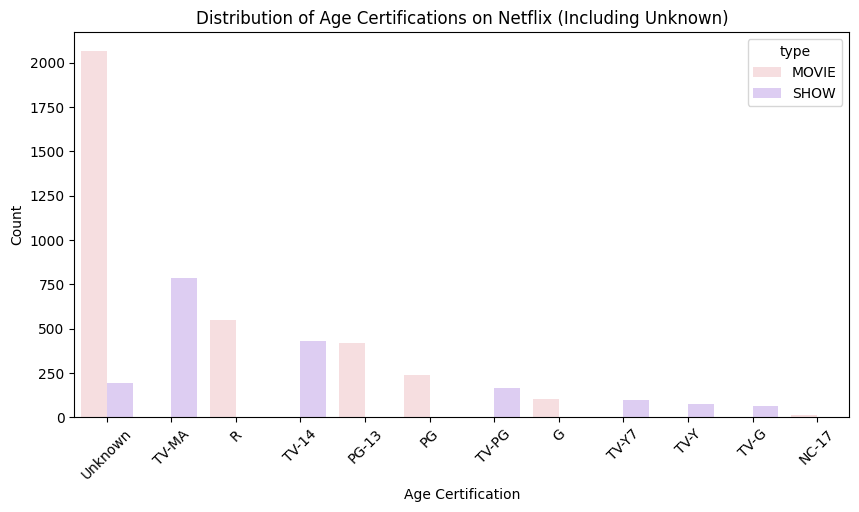

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="age_certification", order=df["age_certification"].value_counts().index, hue="type", palette=palette)
plt.title("Distribution of Age Certifications on Netflix (Including Unknown)")
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.xticks(rotation=45) # rotating words for better visibility
plt.show()

The original dataset contains many age certifications, such as NC-17, TV-Y, and various others - many of which had little counts in the dataset. To simplify analysis and make patterns more clear, I grouped them into four broader categories: Kids, Family/Teen, and Mature. 

I used a boxplot here to show variation and median ratings across groups. Initially, I had a boxplot with all of the age certifications ungrouped, which made it difficult to actually derive any insights and was cluttered. Grouping with an age map worked well to illustrate differences. 

After grouping, I found trends in ratings across content types and audience groups:
- **Mature and Family/Teen**: TV shows consistently had **higher average IMDb scores** than movies. This suggests that for content aimed at older teens and adults, Netflix’s shows tend to be perceived as higher quality than movies.
- **Kids**: The **75th percentile ratings** were roughly equal for shows and movies, showing that the top rated kids' content was similar across both types. However, the average IMDb score for kids' shows was slightly higher than the one for movies, implying again that shows perform better with kids.



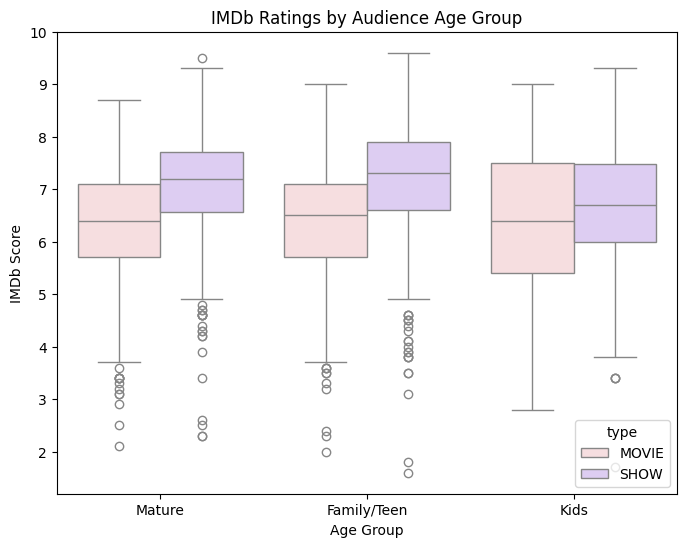

In [14]:
# filter out rows with 'Unknown' age certification for audience analysis
df_cert_filtered = df[df['age_certification'] != "Unknown"].copy()

# mapping
age_map = {
    "TV-Y": "Kids",
    "TV-Y7": "Kids",
    "TV-G": "Kids",
    "G": "Kids",
    "PG": "Family/Teen",
    "TV-PG": "Family/Teen",
    "PG-13": "Family/Teen",
    "TV-14": "Family/Teen",
    "R": "Mature",
    "NC-17": "Mature",
    "TV-MA": "Mature",
}

df_cert_filtered["age_group"] = df_cert_filtered["age_certification"].map(age_map)

# Now re-run your analysis on age_group instead of age_certification
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cert_filtered, x="age_group", y="imdb_score", hue="type", palette=palette)
plt.title("IMDb Ratings by Audience Age Group")
plt.xlabel("Age Group")
plt.ylabel("IMDb Score")
plt.show()

In [15]:
# original box plot with all age ceritfications ungrouped [trial and error]
# plt.figure(figsize=(8,5))
# sns.boxplot(data=df, x="age_certification", y="imdb_score", hue="type", palette="Set2")
# plt.title("IMDb Scores by Age Certification")
# plt.xlabel("Age Certification")
# plt.ylabel("IMDb Score")
# plt.xticks(rotation=45)
# plt.show()

Based on the Average IMDb Votes by Age Group and Content Type bar graph, we can look at audience engagement (IMDb votes) across Mature, Family/Teen, and Kids categories, separated by Movies and Shows.
- Mature content tends to dominate engagement, with movies attracting the largest share of votes.
- In all three categories, movies appear to attract more engagement and votes. 

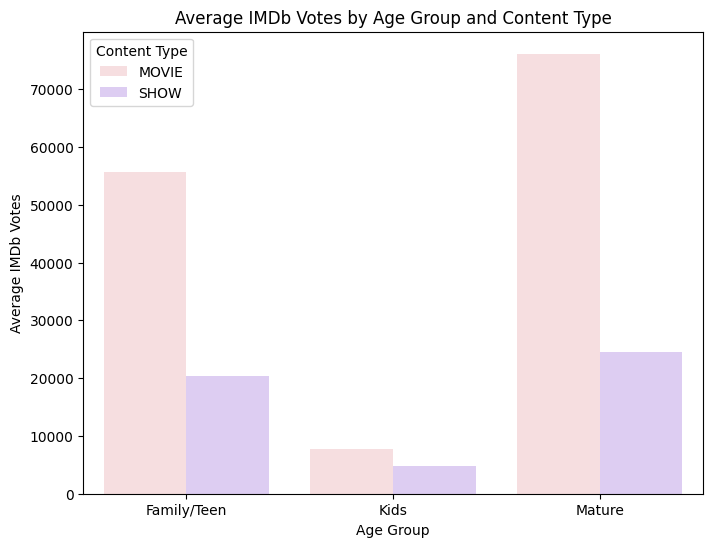

In [16]:
# average IDMb votes (analyzing engagement) by age group and content type
avg_votes = df_cert_filtered.groupby(["age_group","type"])["imdb_votes"].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=avg_votes, x="age_group", y="imdb_votes", hue="type", palette=palette)
plt.title("Average IMDb Votes by Age Group and Content Type")
plt.xlabel("Age Group")
plt.ylabel("Average IMDb Votes")
plt.legend(title="Content Type")
plt.show()

### Trends Over Time
---
This section looks at how Netflix’s catalog has evolved by release year, focusing on growth in the number of titles, shifts in ratings, and changes in audience engagement. The goal is to see whether increased production has translated into higher-quality or more widely watched content.

In [17]:
# aggregating IMDb scores by release year and content type
trend_df = df.groupby("release_year").agg(
    avg_score=("imdb_score", "mean"),
    avg_votes=("imdb_votes", "mean"),
    count_titles=("id", "count")
).reset_index()

trend_df.head()

,release_year,avg_score,avg_votes,count_titles
0,1953,6.80,231.0,1
1,1954,7.45,21796.0,2
2,1956,6.70,590.0,1
3,1958,7.50,4385.0,1
4,1959,6.70,78.0,1


The Netflix Titles Released vs Average IMDb Votes Over Time visualization compares the number of Netflix titles released per year (blue bars) with their average IMDb votes (pink line). It seems like this dataset might have a lot of older movies, so we will filter out very early years to reduce noise. 

Since 2015, Netflix shows a massive spike in content releases. However, the average IMDb votes per title actually declines compared to earlier years.

For example, 1995 shows the highest average IMDb votes, but one of the smaller amount of titles were released that year. With fewer releases, each title likely had more concentrated audience attention, which led to higher vote counts. In contrast, after 2015, it was likely that the huge volume of content skewed the viewer engagement average. 

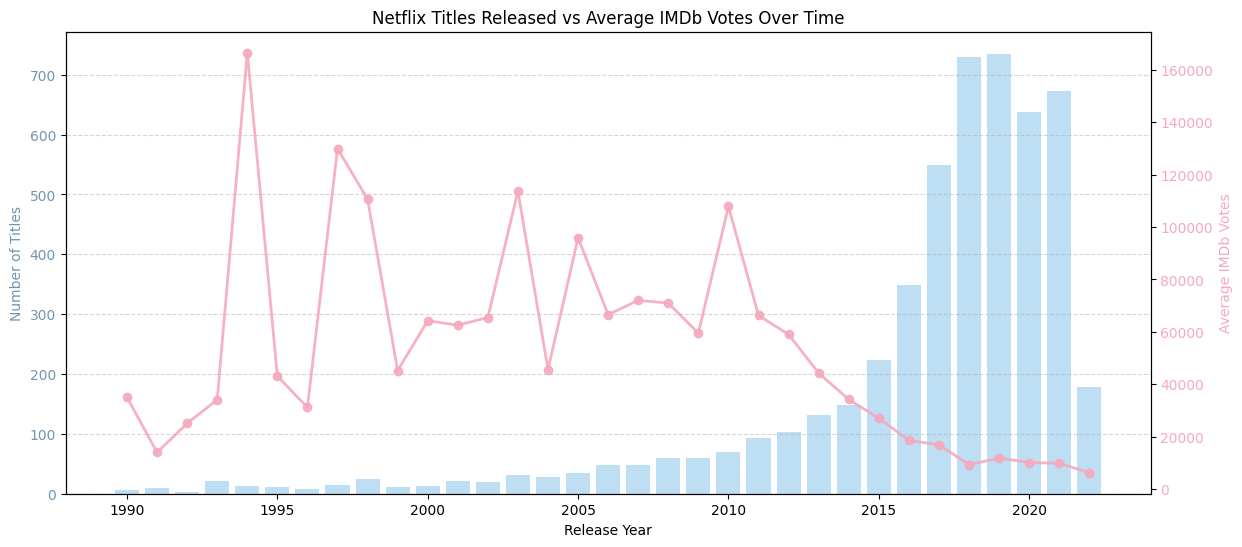

In [18]:
# filtering out very early years to reduce noise
trend_df = trend_df[trend_df["release_year"] >= 1990]

# combined bar and line chart of number of titles released and average IMDb votes over time
fig, ax1 = plt.subplots(figsize=(14,6))

# bar plot for number of titles
ax1.bar(trend_df["release_year"], trend_df["count_titles"], color="#AED6F1", alpha=0.8)
ax1.set_xlabel("Release Year")
ax1.set_ylabel("Number of Titles", color="#7096B0")
ax1.tick_params(axis='y', labelcolor="#7096B0")
ax1.tick_params(axis='x')
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# line plot for average IMDb votes (secondary axis)
ax2 = ax1.twinx()
ax2.plot(trend_df["release_year"], trend_df["avg_votes"], color="#F5A9BC", marker="o", linewidth=2, alpha=0.9)
ax2.set_ylabel("Average IMDb Votes", color="#F5A9BC")
ax2.tick_params(axis='y', labelcolor="#F5A9BC")

plt.title("Netflix Titles Released vs Average IMDb Votes Over Time")
plt.show()

The dual-axis chart worked well to show both production growth and audience engagment trends together. It also made it much easier to see how a surge in the number of titles released in a given year could dilute average engagement (IMDb votes), since a larger catalog means not every title will attract the same level of attention or ratings. At first, I displayed these as two separate charts, but combining them made the finding much easier for the audience to see at a glance.

In [19]:
# # counting number of titles released per year [trial and error]
# count_df = df[df["release_year"] >= 1990].groupby("release_year")["id"].count().reset_index()
# count_df.rename(columns={"id": "num_titles"}, inplace=True)

# # bar graph of number of titles released per year [trial and error]
# plt.figure(figsize=(12,6))
# sns.lineplot(data=count_df, x="release_year", y="num_titles", marker="o", color="skyblue")
# plt.title("Number of Netflix Titles Released per Year")
# plt.xlabel("Release Year")
# plt.ylabel("Number of Titles")
# plt.show()

In [20]:
# # line chart of average IMDb votes (engagement) over time [trial and error]
# plt.figure(figsize=(12,6))
# sns.lineplot(data=trend_df, x="release_year", y="avg_votes", marker="o")
# plt.title("Average IMDb Votes (Popularity) of Netflix Titles Over Time")
# plt.xlabel("Release Year")
# plt.ylabel("Average IMDb Votes")
# plt.show()

This Average IMDb Score of Netflix Titles Over Time line chart shows the trend of average ratings for Netflix content from 1990 - 2022. The average IMDb rating of Netflix titles seem to stay between 6-8. 

Line charts are intuitive for a non-technical audience for showing trends over time. This worked well here, though the range of IMDb scores was narrow, making changes less dramatic. 


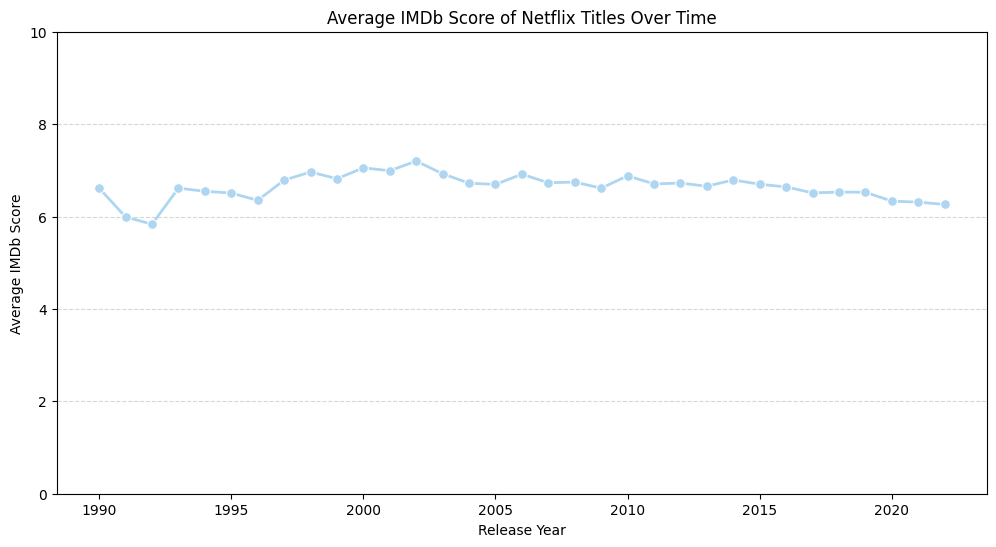

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x="release_year", y="avg_score", marker="o", markersize=7, color="#AED6F1", linewidth=2)
plt.title("Average IMDb Score of Netflix Titles Over Time")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Score")
plt.ylim(0,10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In the Netflix Title Ratings and Popularity by Release Year scatter plot, each point represents a different title, with size indicating popularity (IDMb votes). This visualization shows the spread of ratings each year, revealing whether certain years had more standout hits or generally stronger content. We can see that in 2008, Netflix had a show that had a very high rating and IDMb votes. Additionally, in 2010 we can see there was a hit movie with high ratings and engagement.

The scatterplot revealed outliers and "big bubble" hits fairly clearly, which wouldn't be visible in an aggregate chart. A drawback is overplotting for the years with many titles. 

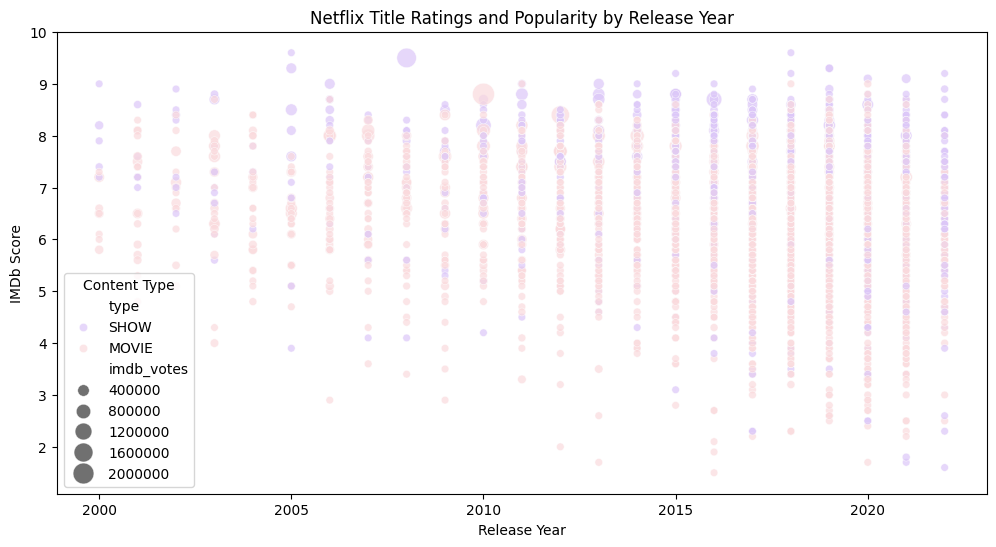

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df[df['release_year']>=2000], x="release_year", y="imdb_score", size="imdb_votes", hue="type",
    palette=palette,alpha=0.7,sizes=(30, 250))

plt.title("Netflix Title Ratings and Popularity by Release Year")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.legend(title="Content Type", frameon=True)
plt.show()

To better understand the large circles in the scatterplot, I took a look at the top Netflix titles by engagement (IDMb votes). The results show that globally popular movies such as Inception (2010), Django Unchained (2012), and The Imitation Game (2014) dominate the list. Similarly, critically acclaimed shows like Breaking Bad (2008), Stranger Things (2016), and The Walking Dead (2010) appear as major outliers with extremely high engagement.

In [23]:
df_big_bubbles= df[df['release_year'] >= 2000]

# Sort by IMDb votes (biggest bubbles first)
top_titles = df_big_bubbles.sort_values(by="imdb_votes", ascending=False)[
    ["title", "type", "release_year", "imdb_score", "imdb_votes"]
].head(15)

pd.set_option("display.float_format", "{:,.0f}".format)  # format votes without decimals

top_titles

,title,type,release_year,imdb_score,imdb_votes
246,Inception,MOVIE,2010,9,"2,268,288"
229,Breaking Bad,SHOW,2008,10,"1,727,694"
662,Django Unchained,MOVIE,2012,8,"1,472,668"
1145,Stranger Things,SHOW,2016,9,"989,090"
230,The Walking Dead,SHOW,2010,8,"945,125"
870,The Imitation Game,MOVIE,2014,8,"748,654"
248,How to Train Your Dragon,MOVIE,2010,8,"719,717"
683,Silver Linings Playbook,MOVIE,2012,8,"697,481"
262,The Social Network,MOVIE,2010,8,"681,286"
250,Casino Royale,MOVIE,2006,8,"644,336"


### Key Findings
---
This analysis examined patterns in Netflix’s catalog to understand which factors drive higher ratings and engagement, using IMDb scores and votes as proxies for popularity and audience engagement. Several insights emerged:

**Content Type (Movies vs. Shows)**:
Netflix offers more movies than TV shows, but shows consistently receive higher average IMDb scores (7.0 vs. 6.3). However, movies receive more IMDb votes on average, suggesting broader engagement. When looking at extremes, top-rated shows outperform top-rated movies, reinforcing that shows may have more lasting audience impact.

**Audience (Age Certifications)**:
Content classified as Mature dominates both in volume and engagement, especially for movies. Across all audience groups (Kids, Family/Teen, Mature), TV shows have slightly higher average ratings than movies, indicating that shows are more favorably reviewed regardless of audience target. Movies, however, consistently attract more engagement in terms of votes.

**Trends Over Time**:
Since 2015, Netflix has rapidly expanded its content production. Despite this surge, average ratings remain steady (between 6–8) while average engagement per title has declined, likely due to audience attention being spread across many more titles. Older releases, especially before 2010, often show higher engagement per title because fewer options concentrated viewership.

**Hit Titles and Outliers**:
Scatterplots revealed standout successes like Breaking Bad (2008), Stranger Things (2016), and Inception (2010), which combined both high ratings and extremely high engagement. These outliers illustrate how globally popular content can dramatically skew engagement patterns.

**Additional Note on Top Titles**:
When ranking by IMDb rating alone, many of the “top” titles were relatively obscure movies and shows I had never heard of. But when I incorporated release year, IMDb votes, and score together, the top titles became much more recognizable. Which goes to show that true cultural impact comes not just from high ratings, but also from widespread audience engagement.

**Actionable Insights**:
- **For Netflix**:
    - Invest more in TV shows: Shows consistently had higher ratings and top performing titles were typically longer series, suggesting that prioritizing high quality shows could strengthen subscriber retention
    - Balance content growth with engagement: The surge in releases since 2015 correlated with lower average engagement per title. So rather than flooding the catalog every year, Netflix could focus on fewer, higher-quality releases.
    - Mature audience content: Mature rated content dominates both in volume and engagement, espescially movies. Netflix could continue investing here and maybe experiment with more standout family/teen films and shows to even out the content. 
    - Highlight culturally impactful titles: Titles that combined high ratings and engagement (Breaking Bad, Stranger Things) could be analyzed to guide further production and research in what made them so successful. 
 - **For Audiences**:
    - Don't rely only on ratings: High IMDb ratings sometimes come from small audiences, so consider both ratings and number of votes to help find a good show or movie.
    - Recognize trade-offs between movies and shows: Movies attract broader engagement, but shows tends to score higher in quality. Viewers could use this to decide what kind of experience they're looking for. 

### Overall Reflection
---
Looking across the analysis as a whole, I often found myself opting for charts/graphs that were easier for a general audience to understand. 
- Bar charts were most effective for categorical comparisons (e.g., content type, age certifications).
- Box plots helped reveal variation in ratings across groups.
- Line and scatterplots worked well for time trends and highlighting outliers/big hits (although scatterplots in particular suffered from overcrowding)

What worked best was combining multiple visualization types to capture different dimensions of the data: average, distributions, and standout titles. What didn't work as well was handling the imbalance of data, which sometimes made engagement averages misleading.

**Color Choices**
- For all my visuals, I opted for using the color codes I used on my portfolio site. Sometimes I had to make the hue a little darker for better viewability. 
- I made sure to consistently have the pink for movies and purple for shows.

**Future Improvements with Time**
- If I had more time, I would expand the analysis to include runtime patterns, since that could reveal additional insights about how length influences ratings or engagement. I did initially want to go into that and it was one of my research questions, but time didn't allow. 
- I would also experiment with Plotly for interactive visualizations, which would eliminate the need to print subsets of the data and allow viewers to hover over points to see exact numbers or titles.

### References
---
1. Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/
2. Seaborn Documentation: https://seaborn.pydata.org/ 
3. Matplotlib Documentation: https://matplotlib.org/stable/index.html 
4. Netflix IMDB Scores Dataset: https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download